In [1]:
import pandas as pd 
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge, Lasso

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import normaltest

import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

import pickle
import json

# problem statement

In [2]:
df=pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# age

In [4]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [5]:
df['age'].value_counts().head(10)

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
Name: age, dtype: int64

In [6]:
df['age'].isnull().sum()

0

# bmi

In [7]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [8]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

# sex

In [9]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [10]:
df['sex'].isna().sum()

0

In [11]:
df['sex']=df['sex'].replace({'female':0,'male':1})

In [12]:
sex_value={'female':0,'male':1}

In [13]:
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


# smoker

In [15]:
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [16]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
df['smoker']=df['smoker'].replace({'no':0,'yes':1})

In [18]:
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [19]:
smoker_value={'no':0,'yes':1}

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


# region

In [21]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [22]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [23]:
df=pd.get_dummies(df,columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


# Feture Selection

In [25]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

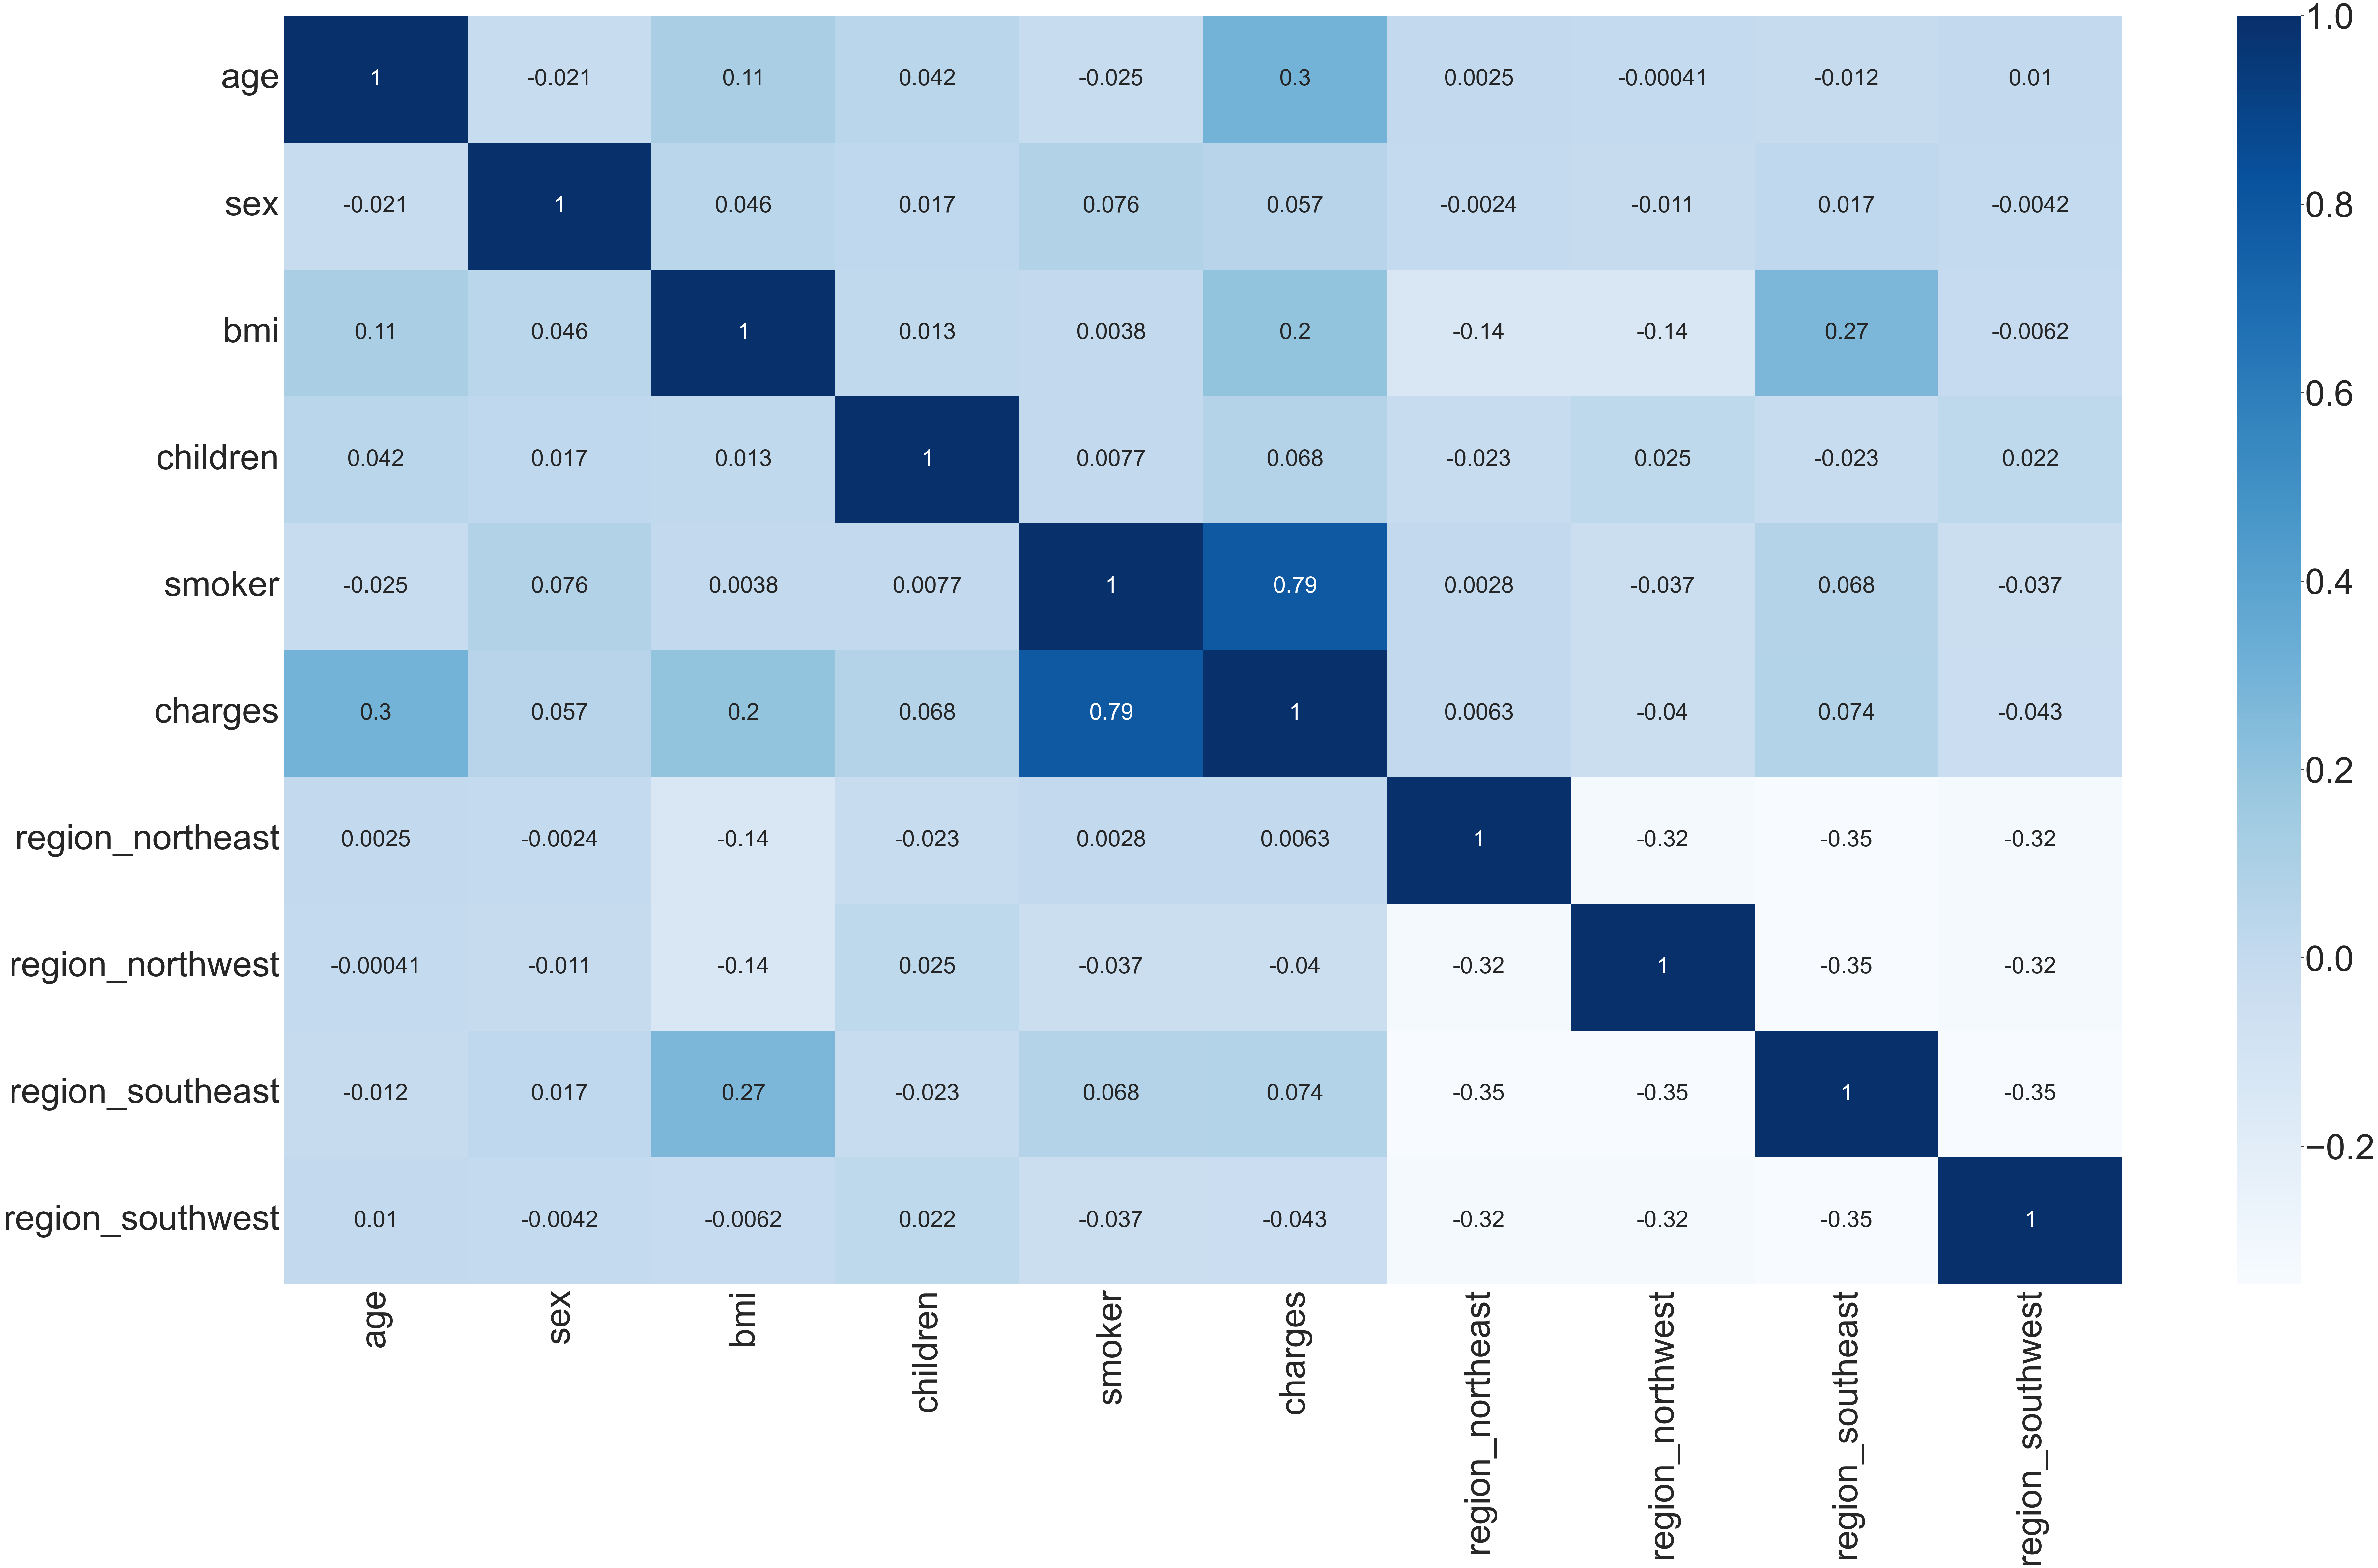

In [26]:
plt.figure(figsize=(90,50))
sns.set(font_scale=7)
sns.heatmap(df.corr(),annot=True,annot_kws={"size":50},cmap="Blues")

# VIF

<AxesSubplot:>

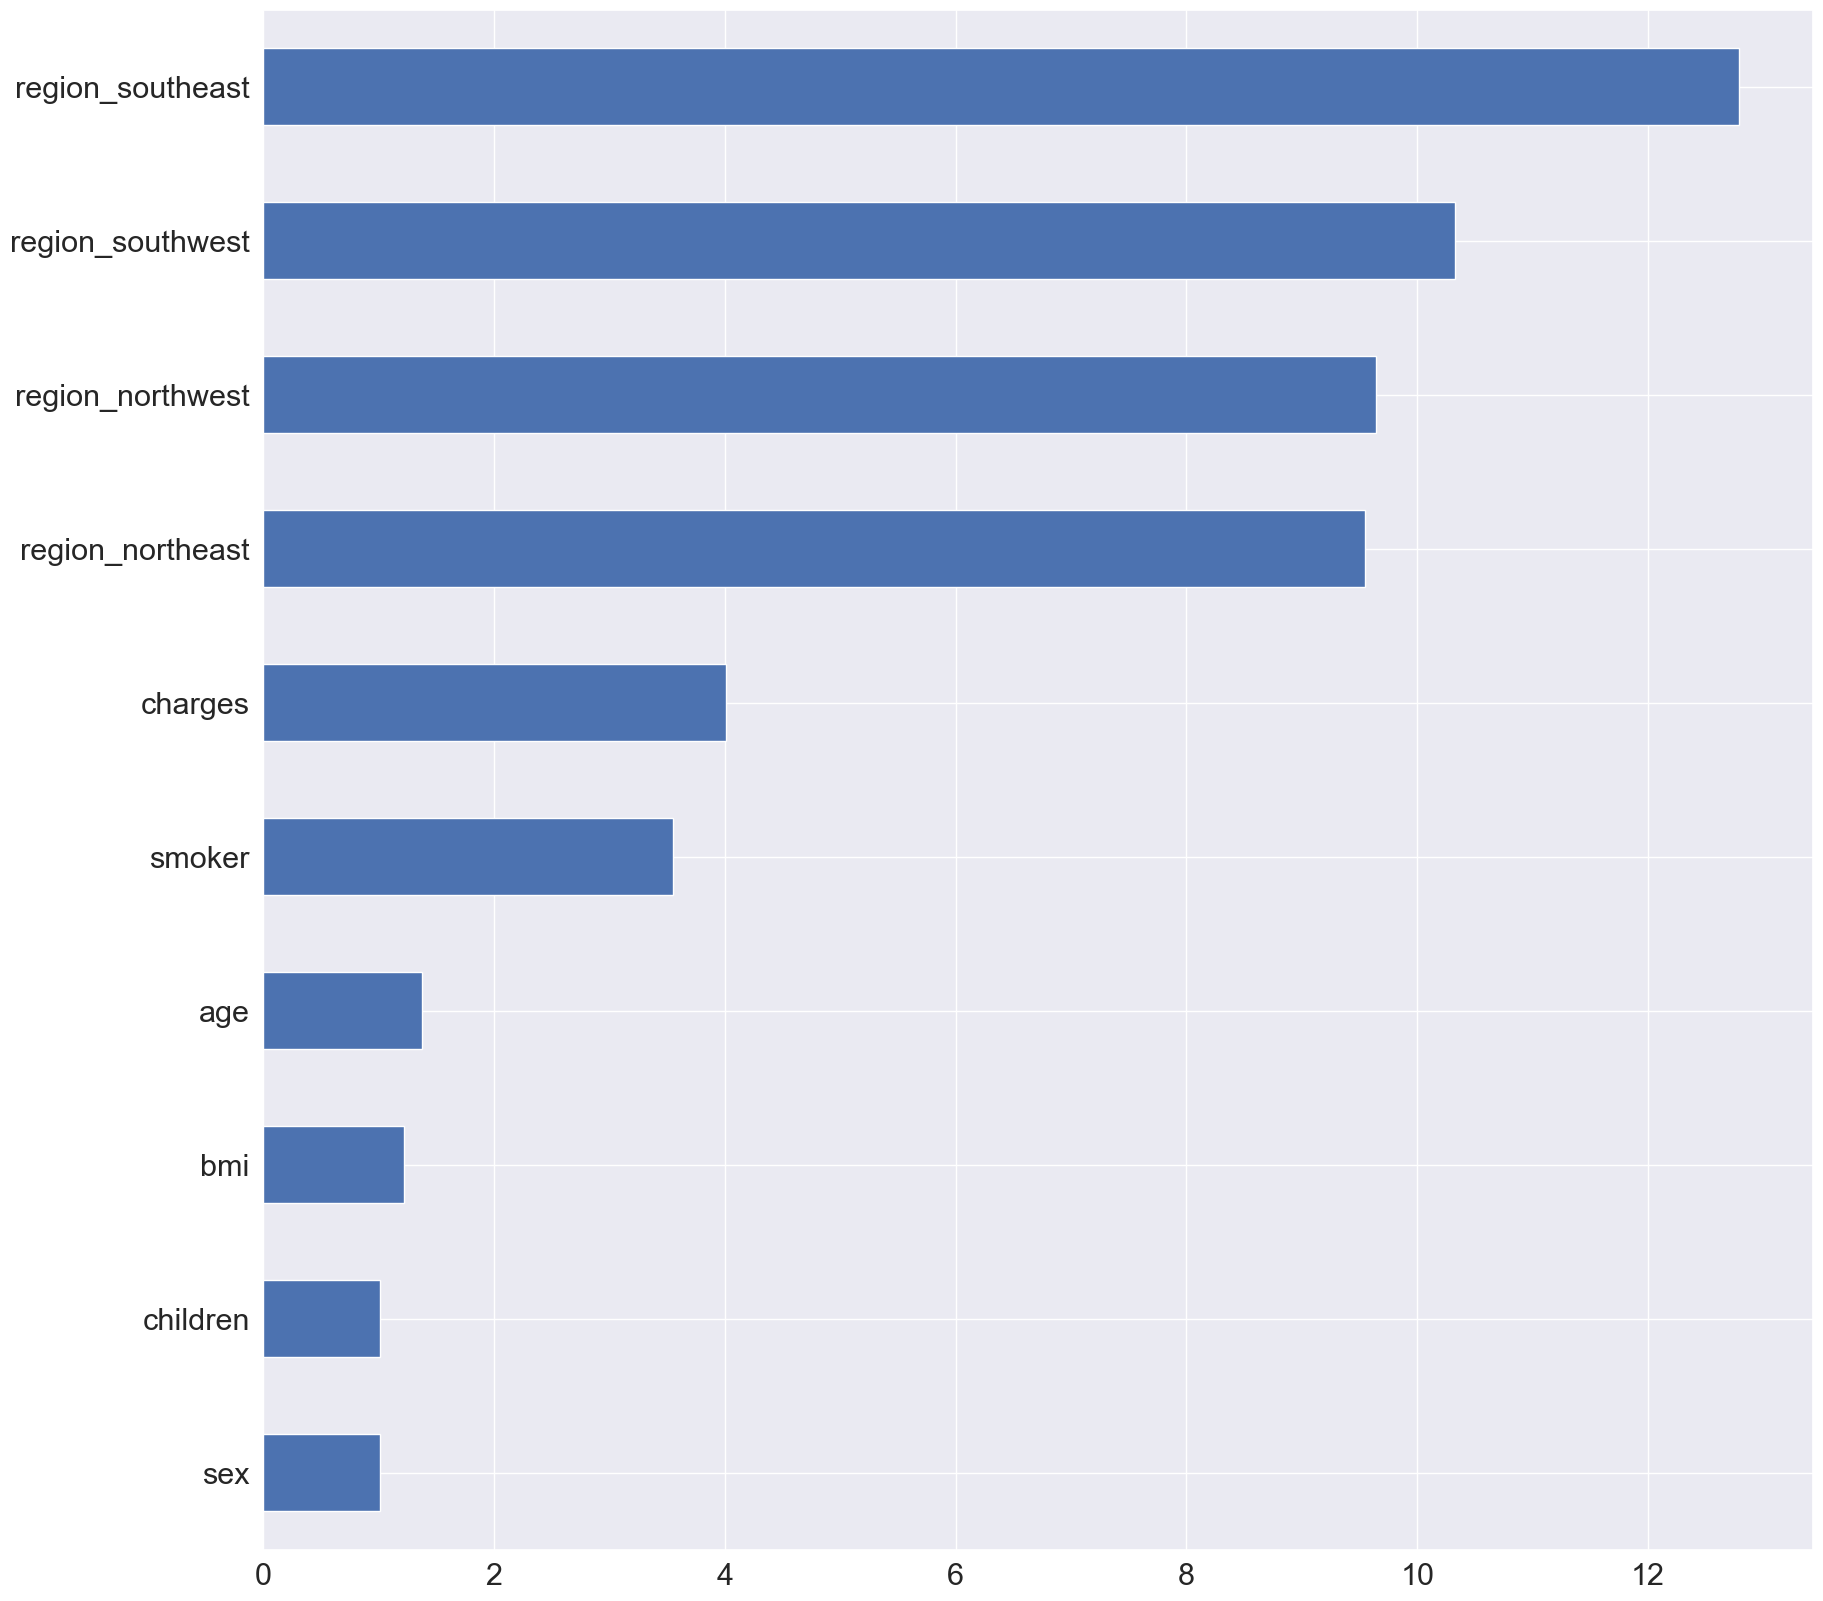

In [27]:
vif_list=[]
for i in range(df.shape[1]):
    vif=variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)
s1=pd.Series(vif_list,index=df.columns)
plt.figure(figsize=(20,20))
sns.set(font_scale=2)
s1.sort_values().plot(kind='barh')

# Model Building

In [28]:
x=df.drop(['charges'],axis=1)
y=df['charges']

In [29]:
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [30]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [31]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=9)

In [32]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
333,56,0,28.785,0,0,1,0,0,0
644,43,1,35.310,2,0,0,0,1,0
1134,28,1,33.820,0,0,0,1,0,0
852,46,0,35.530,0,1,1,0,0,0
514,39,1,28.300,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
56,58,0,31.825,2,0,1,0,0,0
501,43,1,26.030,0,0,1,0,0,0
638,39,1,26.410,0,1,1,0,0,0
348,36,0,29.920,1,0,0,0,1,0


In [33]:
x_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
227,58,0,41.910,0,0,0,0,1,0
1235,26,1,31.065,0,0,0,1,0,0
985,44,0,25.800,1,0,0,0,0,1
326,27,0,23.210,1,0,0,0,1,0
352,30,0,27.700,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
81,45,0,38.285,0,0,1,0,0,0
1152,43,0,32.560,3,1,0,0,1,0
200,19,0,32.110,0,0,0,1,0,0
228,41,0,31.635,1,0,1,0,0,0


In [34]:
y_train

333     11658.37915
644     18806.14547
1134    19673.33573
852     42111.66470
514     21082.16000
           ...     
56      13607.36875
501      6837.36870
638     20149.32290
348      5478.03680
382     20781.48892
Name: charges, Length: 1070, dtype: float64

In [35]:
y_test

227     24227.33724
1235     2699.56835
985      7624.63000
326      3561.88890
352      3554.20300
           ...     
81       7935.29115
1152    40941.28540
200      2130.67590
228      7358.17565
422     39125.33225
Name: charges, Length: 268, dtype: float64

### create instance of the model

In [36]:
model=LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
model.coef_

array([  256.37546835,   -50.93476295,   316.95418283,   442.0353826 ,
       23657.52830203,   356.95834031,   364.96131036,  -291.5440622 ,
        -430.37558847])

In [39]:
model.intercept_

-11796.501184500421

# 7. Model Evaluation

In [40]:
y_pred = model.predict(x_test)

In [41]:
# y_pred

#### 1. Residual

In [42]:
residual = y_test - y_pred
residual

227     8162.055520
1235   -2329.900880
985      -48.467134
326      929.254535
352     -689.815142
           ...     
81     -4296.652972
1152    6701.522865
200    -1486.316935
228    -2182.556665
422     5873.054096
Name: charges, Length: 268, dtype: float64

In [43]:
# Model Evaluation for Testing Data

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred)
print("R Squared Value :",r_squared_value)

r2 = model.score(x_test, y_test)
print("Direct R Squared Value :",r2)

adj_r2  = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 31450998.635947134
Root Mean Sqaured Error : 5608.118992670104
Mean Absolute Error : 3820.166553072428
R Squared Value : 0.7775428684674436
Direct R Squared Value : 0.7775428684674436
Adjusted R Squared Value : 0.7697827359721219


In [44]:
# Model Evaluation for Training Data

y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)

# Direct calculation
r2 = model.score(x_train, y_train)
print("Direct R Squared Value :",r2)

adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 37822202.96540095
Root Mean Sqaured Error : 6149.975850798192
Mean Absolute Error : 4245.9796818395
R Squared Value : 0.7441475882031922
Direct R Squared Value : 0.7441475882031922
Adjusted R Squared Value : 0.7419752564049173


# Normality of Residual

In [45]:
Residual = y_train - y_pred_train
Residual

333      -382.630387
644      7845.257379
1134    13257.906790
852      6839.025582
514     -9708.038789
            ...     
56       -794.003204
501      -946.616211
638    -10387.131029
348     -1588.739347
382      8360.330137
Name: charges, Length: 1070, dtype: float64

### 1. kdeplot

<AxesSubplot:xlabel='charges', ylabel='Density'>

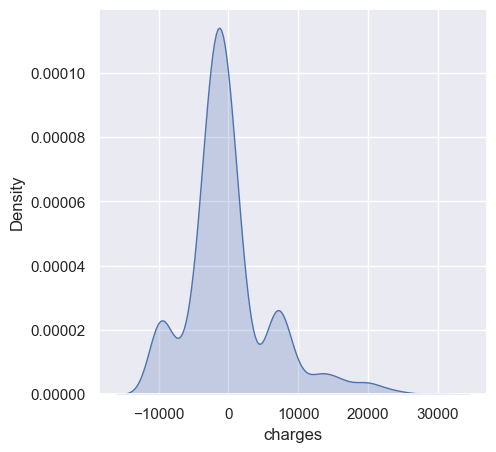

In [46]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1)
sns.kdeplot(Residual, fill=True)

In [47]:
# Mean
mean = Residual.mean()
print("Mean -->",mean)

median = Residual.median()
print("median -->",median)

mode = Residual.mode()[0]
print("Mode -->",mode)

Mean --> -9.366945433212774e-13
median --> -990.414853600907
Mode --> -11418.501292257963


### Hypothesis Testing

#### Shapiro Test

In [48]:
_ , p_val = shapiro(Residual)

print("P_Value:",p_val)

P_Value: 2.9246509615563694e-26


####  KS test

In [49]:
_ , p_val = kstest(Residual, 'norm')

print("P_Value:",p_val)

P_Value: 0.0


#### Normal test

In [50]:
_ , p_val = normaltest(Residual)

print("P_Value:",p_val)

P_Value: 1.3065698245801963e-52


## QQ Plot

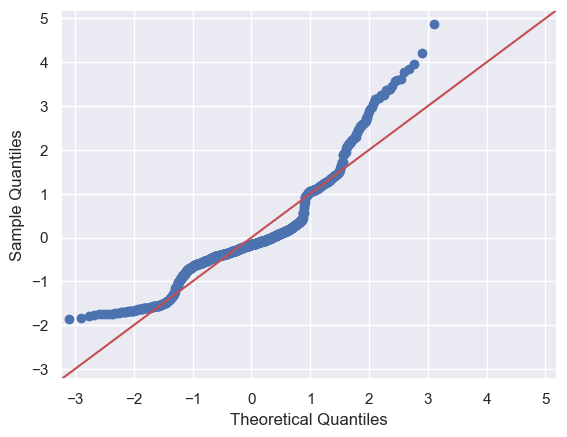

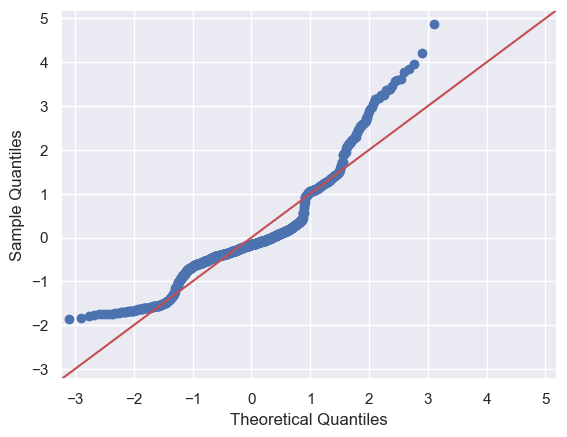

In [51]:
sm.qqplot(Residual, line = '45', fit=True)

## 4. Homoscedasticity

<AxesSubplot:xlabel='charges', ylabel='charges'>

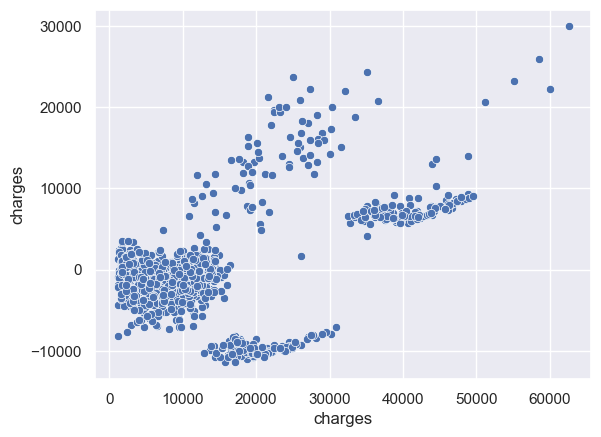

In [52]:
sns.scatterplot(x = y_train, y= Residual)

<AxesSubplot:>

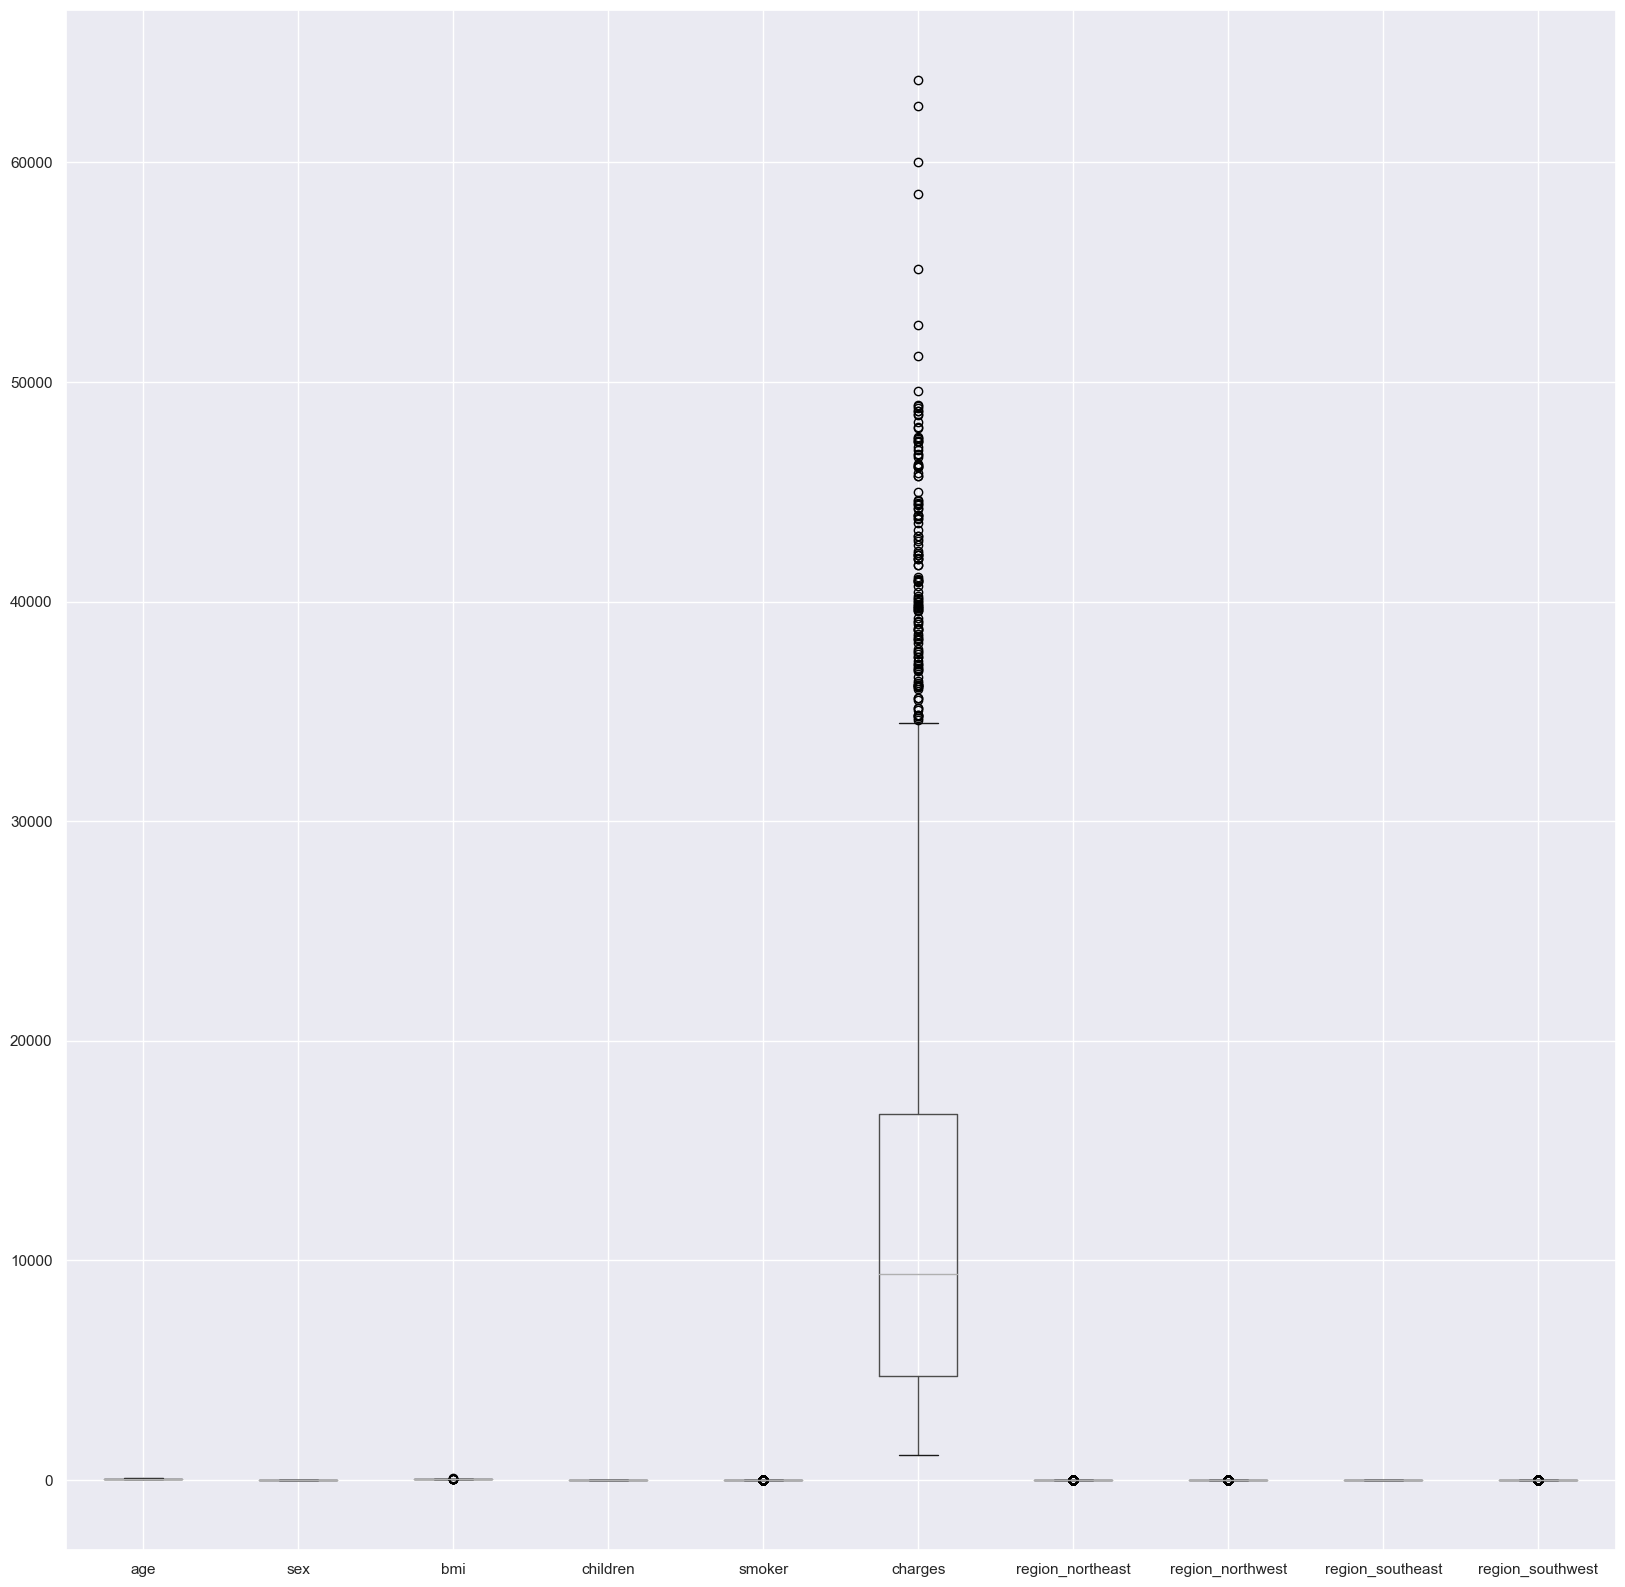

In [53]:
plt.figure(figsize=(20,20))
df.boxplot()

In [54]:
q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(0.50)
q3 = df['bmi'].quantile(0.75)
median = df['bmi'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 26.29625
Q2 : 30.4
Q3 : 34.69375
Median : 30.4
upper_tail : 47.290000000000006
lower_tail : 13.7


<AxesSubplot:xlabel='bmi'>

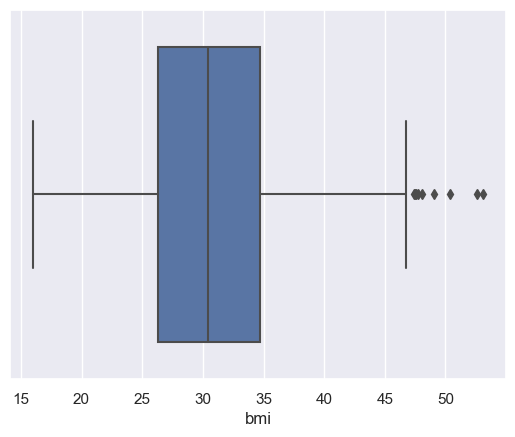

In [55]:
sns.boxplot(x = df['bmi'])

In [56]:
df[['bmi']].loc[df['bmi'] > upper_tail]=upper_tail

<AxesSubplot:xlabel='bmi'>

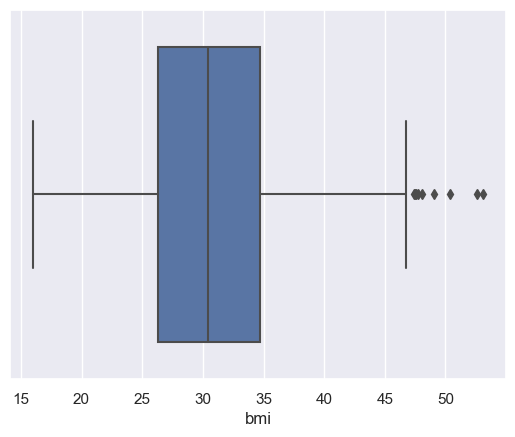

In [57]:
sns.boxplot(x = df['bmi'])

<AxesSubplot:>

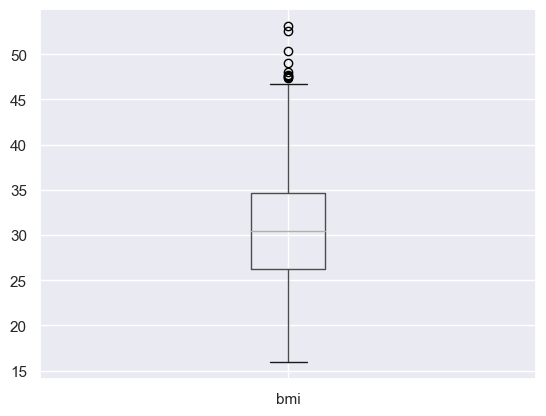

In [58]:
df[['bmi']].boxplot()

In [59]:
df.loc[df['bmi'] > upper_tail, 'bmi'] = upper_tail

# outlier handle:smoker

In [60]:
q1 = df['age'].quantile(0.25)
q2 = df['age'].quantile(0.50)
q3 = df['age'].quantile(0.75)
median = df['age'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 27.0
Q2 : 39.0
Q3 : 51.0
Median : 39.0
upper_tail : 87.0
lower_tail : -9.0


<AxesSubplot:>

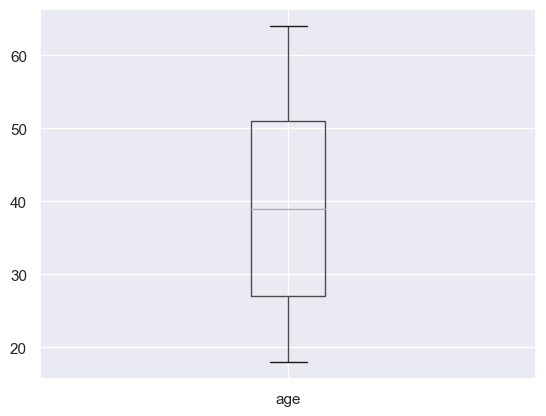

In [61]:
df[['age']].boxplot()

## 2. Ridge Regression

In [62]:
ridge_reg_model = Ridge(alpha= 1.0)  

ridge_reg_model.fit(x_train, y_train)

Ridge()

In [63]:
# Training Dataset

y_pred_train = ridge_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 37825179.22376498
RMSE : 6150.2178192129895
MAE : 4255.797477024972
R2 Scored : 0.7441274549792956
Adjusted R Squared Value : 0.7419549522385538


In [64]:
# Testing Dataset

y_pred = ridge_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 31494761.49337484
RMSE : 5612.0193774945965
MAE : 3831.9012277567385
R2 Scored : 0.7772333279074212
Adjusted R Squared Value : 0.769462397485587


<AxesSubplot:>

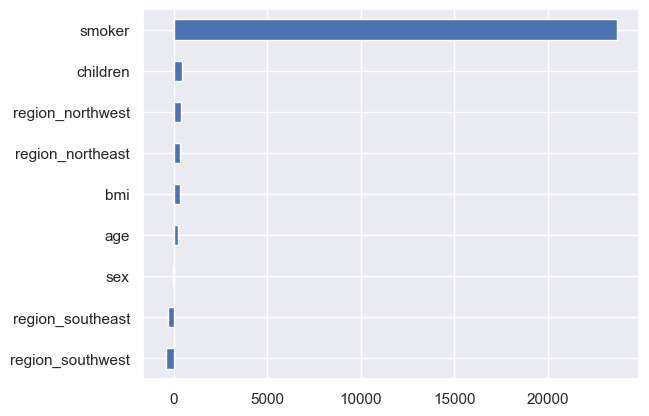

In [65]:
model.coef_

s2 = pd.Series(model.coef_, index=x.columns)
s2.sort_values().plot(kind = "barh")

## 3. Lasso Regression

In [66]:
lasso_reg_model = Lasso(alpha= 1.0)  

lasso_reg_model.fit(x_train, y_train)

Lasso()

In [67]:
# Training Dataset

y_pred_train = lasso_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 37822232.834665015
RMSE : 6149.978279202701
MAE : 4246.223022272431
R2 Scored : 0.7441473861493018
Adjusted R Squared Value : 0.7419750526354751


In [68]:
# Testing Dataset

y_pred = lasso_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 31456230.175232068
RMSE : 5608.585398764297
MAE : 3821.0845518696437
R2 Scored : 0.7775058650884318
Adjusted R Squared Value : 0.7697444417775632


## Hyperparameter Tunning

# Ridge Regression

### 1. GridSearchCv

In [69]:
# Model instance
ridge_model = Ridge()

# Defined param_grid
param_grid = {"alpha": np.arange(0.01,3,0.01)}


gscv_ridge_model = GridSearchCV(ridge_model, param_grid, n_jobs=-1)

gscv_ridge_model.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [70]:
gscv_ridge_model.best_estimator_

Ridge(alpha=0.66)

In [71]:
ridge_reg_model = Ridge(alpha= 1.18)  

ridge_reg_model.fit(x_train, y_train)

Ridge(alpha=1.18)

In [72]:
# Training Dataset

y_pred_train = ridge_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 37826338.50588304
RMSE : 6150.312065731546
MAE : 4257.561905716614
R2 Scored : 0.7441196128891314
Adjusted R Squared Value : 0.7419470435646052


In [73]:
# Testing Dataset

y_pred = ridge_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 31503183.099195424
RMSE : 5612.769646012156
MAE : 3833.9992684654176
R2 Scored : 0.7771737607599538
Adjusted R Squared Value : 0.7694007524143708


### 2. RandomizedSearchCV

In [74]:
# Model instance
ridge_model = Ridge()

# Defined param_grid
param_grid = {"alpha": np.arange(0.01,3,0.01)}

rscv_ridge_model = RandomizedSearchCV(ridge_model, param_grid, n_jobs=-1)

rscv_ridge_model.fit(x_train, y_train)

rscv_ridge_model.best_estimator_

Ridge(alpha=0.67)

In [75]:
ridge_reg_model = Ridge(alpha= 1.03) 
ridge_reg_model.fit(x_train, y_train)

Ridge(alpha=1.03)

In [76]:
# Training Dataset

y_pred_train = ridge_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 37825359.38417206
RMSE : 6150.232465864365
MAE : 4256.091798912901
R2 Scored : 0.7441262362645976
Adjusted R Squared Value : 0.7419537231762782


In [77]:
# Testing Dataset

y_pred = ridge_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 31496153.70814272
RMSE : 5612.143414787502
MAE : 3832.25120028324
R2 Scored : 0.7772234805856453
Adjusted R Squared Value : 0.7694522066525864


# LASSO Regression

### 1. GridSearchCv

In [78]:
# Model instance
ridge_model = Lasso()

# Defined param_lasso
param_lasso = {"alpha": np.arange(0.01,3,0.01)}


gscv_lasso_model = GridSearchCV(ridge_model, param_grid, n_jobs=-1)

gscv_lasso_model.fit(x_train, y_train)

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [79]:
gscv_lasso_model.best_estimator_

Lasso(alpha=2.9899999999999998)

In [80]:
lasso_reg_model = Lasso(alpha= 2.9899)  

lasso_reg_model.fit(x_train, y_train)

Lasso(alpha=2.9899)

In [81]:
# Training Dataset

y_pred_train = lasso_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 37822469.95867977
RMSE : 6149.997557615757
MAE : 4246.718020059525
R2 Scored : 0.744145782098075
Adjusted R Squared Value : 0.7419734349649454


In [82]:
# Testing Dataset

y_pred = ridge_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 31496153.70814272
RMSE : 5612.143414787502
MAE : 3832.25120028324
R2 Scored : 0.7772234805856453
Adjusted R Squared Value : 0.7694522066525864


### 2. RandomizedSearchCV

In [83]:
# Model instance
ridge_model = Lasso()

# Defined param_grid
param_lasso = {"alpha": np.arange(0.01,3,0.01)}

rscv_lasso_model = RandomizedSearchCV(ridge_model, param_grid, n_jobs=-1)

rscv_lasso_model.fit(x_train, y_train)

rscv_lasso_model.best_estimator_

Lasso(alpha=2.29)

In [84]:
lasso_reg_model = Lasso(alpha= 2.8299) 
lasso_reg_model.fit(x_train, y_train)

Lasso(alpha=2.8299)

In [85]:
# Training Dataset

y_pred_train = lasso_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 37822442.148365274
RMSE : 6149.995296613264
MAE : 4246.6776737157315
R2 Scored : 0.7441459702239765
Adjusted R Squared Value : 0.7419736246881423


In [86]:
# Testing Dataset

y_pred = lasso_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 31465955.10557893
RMSE : 5609.452299964671
MAE : 3822.7657583656696
R2 Scored : 0.7774370793517893
Adjusted R Squared Value : 0.7696732565384796


In [87]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,1.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [88]:
column_names=x.columns
list(column_names)
len(column_names)

9

In [89]:
with open("Linear Model.pkl","wb") as f:
    pickle.dump(model,f)

In [90]:
json_data={"sex":{'female': 0, 'male': 1},
           "smoker":{'no': 0, 'yes': 1},
           "columns":list(column_names)}
json_data

{'sex': {'female': 0, 'male': 1},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [91]:
with open("project_data.json","w") as f:
    json.dump(json_data,f)

# single user input testing

In [92]:
age=19.0
sex="male"
bmi=27.9
children=0.0
smoker="no"
region="northwest"
region="region_"+region
region



'region_northwest'

In [93]:
region_index=np.where(column_names==region)[0][0]     # where is my region present it will give the index
region_index

6

In [94]:
region_index=list(column_names).index(region)
region_index

6

In [95]:
test_array=np.zeros(len(column_names))

test_array[0]=age
test_array[1]=json_data["sex"][sex]
test_array[2]=bmi
test_array[3]=children
test_array[4]=json_data["smoker"][smoker]
test_array[region_index]=1

test_array

array([19. ,  1. , 27.9,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ])

In [96]:
charges=round(model.predict([test_array])[0],2)
print(f"predicted Medical insurance charges is :{charges} /- RS only")

predicted Medical insurance charges is :2231.68 /- RS only
